In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
#os.chdir("//content/drive/MyDrive") #這邊輸入欲使用的資料夾路徑
#os.getcwd()

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 7.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import cv2
import seaborn as sns
import mahotas
import glob
import argparse
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AOI_train.csv")
train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [ ]:
data_path = "/content/drive/MyDrive/AOI_Train_Image" #路徑掛載到存放圖片的資料夾路徑
img = cv2.imread(os.path.join(data_path, train.loc[678, "ID"]))

image shape: (512, 512, 3)
data type: uint8
min: 100, max: 255


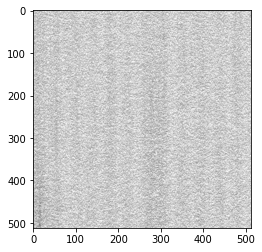

In [ ]:
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [ ]:
normal_list = train[train["Label"]==0]["ID"].values
void_list = train[train["Label"]==1]["ID"].values
horizontal_list = train[train["Label"]==2]["ID"].values
vertical_list = train[train["Label"]==3]["ID"].values
edge_list = train[train["Label"]==4]["ID"].values
particle_list = train[train["Label"]==5]["ID"].values

label_list=[normal_list,void_list,horizontal_list,vertical_list,edge_list,particle_list]

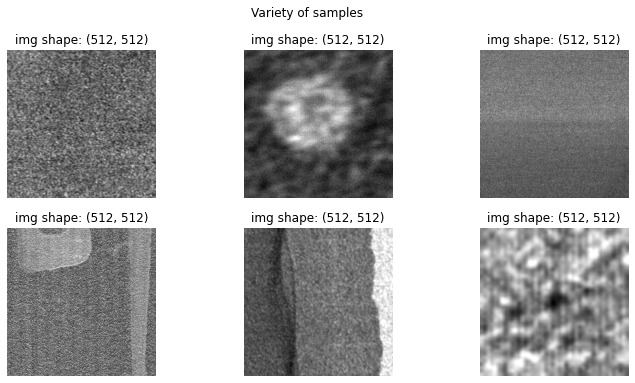

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = cv2.imread(os.path.join(data_path, label_list[i][1]),0)
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

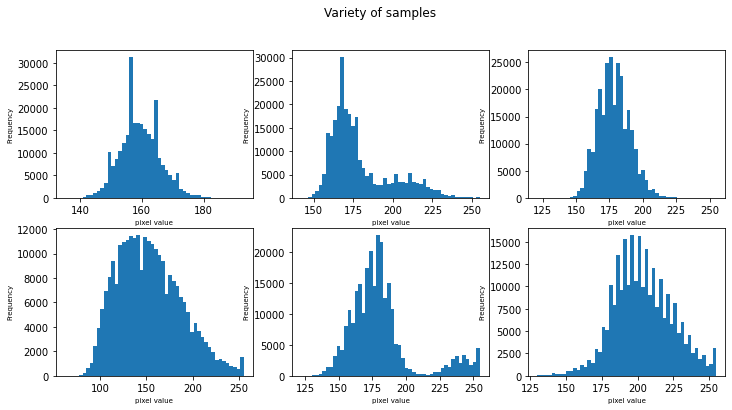

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = cv2.imread(os.path.join(data_path, label_list[i][1]),0)
    plt.hist(img.reshape(-1), bins=50)
    plt.xlabel("pixel value", fontsize=7)
    plt.ylabel("Frequency", fontsize=7)
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


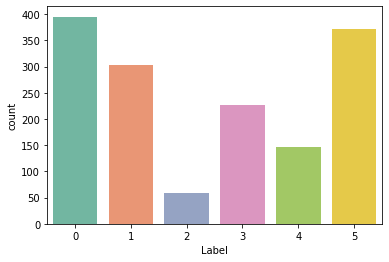

In [ ]:
train["Label"].value_counts()
sns.set_palette("Set2")
sns.countplot('Label', data=train)

In [ ]:
import statistics
a=img.reshape(-1)

In [ ]:
def describe(image, mask=None):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hara = mahotas.features.haralick(image).mean(axis=0)
  return hara

In [ ]:
img = cv2.imread(os.path.join(data_path, train.loc[0,"ID"]))
features = describe(image=img)
df = pd.DataFrame([features])
df
for i in range(1,len(train)):
  img = cv2.imread(os.path.join(data_path, train.loc[i,"ID"]))
  features = describe(image=img)
  df_new = pd.DataFrame([features])
  df = pd.concat([df,df_new])

In [ ]:
df6 = df.copy()
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000226,714.260755,0.086931,391.134065,0.048024,346.768930,850.275504,6.885095,12.571946,0.000069,5.793479,-0.006469,0.266057
0,0.000477,98.809934,0.901611,502.106906,0.134081,358.787914,1909.617689,7.403880,11.605845,0.000222,4.339433,-0.196541,0.952145
0,0.003834,3.342049,0.995506,371.769769,0.483884,357.889536,1483.737027,6.894114,8.758403,0.001034,2.116119,-0.515693,0.998749
0,0.002450,4.640281,0.996595,681.381866,0.449462,413.948307,2720.887185,7.580373,9.613825,0.000886,2.330350,-0.544206,0.999578
0,0.002648,2.706267,0.996752,416.633624,0.518481,406.947977,1663.828230,7.343552,9.040460,0.001119,1.988782,-0.576473,0.999632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000568,72.432847,0.946700,679.425086,0.149641,351.007518,2645.267495,7.413322,11.419213,0.000255,4.135555,-0.230201,0.970820
0,0.000354,394.465233,0.401466,329.532328,0.066702,332.143910,923.664079,6.782420,12.017125,0.000100,5.356074,-0.026212,0.501032
0,0.000394,72.950822,0.944786,660.586340,0.145398,331.214245,2569.394537,7.695078,11.744803,0.000250,4.148360,-0.251029,0.980629
0,0.000845,20.003226,0.979135,479.349247,0.251119,326.207950,1897.393760,7.462361,10.599311,0.000470,3.261734,-0.362098,0.994847


In [ ]:
df6.index = train["Label"].index
df6 = pd.concat([df6,train["Label"]],axis = 1)
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12,Label
0,0.000226,714.260755,0.086931,391.134065,0.048024,346.768930,850.275504,6.885095,12.571946,0.000069,5.793479,-0.006469,0.266057,0
1,0.000477,98.809934,0.901611,502.106906,0.134081,358.787914,1909.617689,7.403880,11.605845,0.000222,4.339433,-0.196541,0.952145,1
2,0.003834,3.342049,0.995506,371.769769,0.483884,357.889536,1483.737027,6.894114,8.758403,0.001034,2.116119,-0.515693,0.998749,1
3,0.002450,4.640281,0.996595,681.381866,0.449462,413.948307,2720.887185,7.580373,9.613825,0.000886,2.330350,-0.544206,0.999578,5
4,0.002648,2.706267,0.996752,416.633624,0.518481,406.947977,1663.828230,7.343552,9.040460,0.001119,1.988782,-0.576473,0.999632,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000568,72.432847,0.946700,679.425086,0.149641,351.007518,2645.267495,7.413322,11.419213,0.000255,4.135555,-0.230201,0.970820,4
1496,0.000354,394.465233,0.401466,329.532328,0.066702,332.143910,923.664079,6.782420,12.017125,0.000100,5.356074,-0.026212,0.501032,3
1497,0.000394,72.950822,0.944786,660.586340,0.145398,331.214245,2569.394537,7.695078,11.744803,0.000250,4.148360,-0.251029,0.980629,1
1498,0.000845,20.003226,0.979135,479.349247,0.251119,326.207950,1897.393760,7.462361,10.599311,0.000470,3.261734,-0.362098,0.994847,1


In [1]:
df6.to_csv("/content/drive/MyDrive/train_haralick.csv")

NameError: ignored

## 模型測試

In [ ]:
config = {'trials': 5,
      'train_ratio': 0.8,
      'test_ratio': 0.2
}
trials = config['trials']

In [ ]:
test_acc = 0.0
for trial in range(trials):
  train_data, test_data, train_target, test_target = train_test_split(
     df6.iloc[:,:-1], df6.iloc[:,-1], test_size = config['test_ratio'],shuffle=True)
  
  poly = svm.SVC(kernel='poly',random_state=1234).fit(train_data, train_target)

  poly_pred = poly.predict(test_data)

  test_acc += metrics.accuracy_score(test_target, poly_pred)
print('Accuracy of testing dataset: ', test_acc/trials)
print(metrics.confusion_matrix(test_target, poly_pred))

Accuracy of testing dataset:  0.5886666666666667
[[81  2  0  0  0  0]
 [11 29  0  0  0  9]
 [ 9  0  0  0  0  0]
 [26  7  0 16  0  1]
 [ 3 23  0  2  0  7]
 [ 2 18  0  2  0 52]]


In [ ]:
test_acc = 0.0
for trial in range(trials):
  train_data, test_data, train_target, test_target = train_test_split(
     df6.iloc[:,:-1], df6.iloc[:,-1], test_size = config['test_ratio'],shuffle=True)
  
  rbf = svm.SVC(kernel='rbf',random_state=1234).fit(train_data, train_target)

  rbf_pred = rbf.predict(test_data)

  test_acc += metrics.accuracy_score(test_target, rbf_pred)
print('Accuracy of testing dataset: ', test_acc/trials)
print(metrics.confusion_matrix(test_target, rbf_pred))

Accuracy of testing dataset:  0.5639999999999998
[[66  5  0  0  0  3]
 [ 4 15  0  2  0 39]
 [14  0  0  0  0  0]
 [19  4  0 11  0 10]
 [ 4  5  0  1  0 21]
 [ 1 10  0  0  0 66]]


In [ ]:
test_acc = 0.0
for trial in range(trials):
  train_data, test_data, train_target, test_target = train_test_split(
     df6.iloc[:,:-1], df6.iloc[:,-1], test_size = config['test_ratio'],shuffle=True)

  # 建立 XGBClassifier 模型
  xgboostModel = XGBClassifier(random_state=1234)
  # 使用訓練資料訓練模型
  xgboostModel.fit(train_data, train_target)
  # 使用訓練資料預測分類
  predicted = xgboostModel.predict(test_data)
  print(metrics.accuracy_score(test_target, predicted))
  test_acc += metrics.accuracy_score(test_target, predicted)
print('Accuracy of testing dataset: ', test_acc/trials)
print(metrics.confusion_matrix(test_target, predicted))

0.8933333333333333
0.92
0.8833333333333333
0.8866666666666667
0.8966666666666666
Accuracy of testing dataset:  0.8960000000000001
[[74  3  0  2  0  0]
 [ 4 58  0  0  1  1]
 [ 4  0  5  0  0  0]
 [ 5  3  0 34  2  0]
 [ 1  4  0  1 24  0]
 [ 0  0  0  0  0 74]]


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

In [ ]:
for c in [0.01,1,100]:
  print(c)

0.01
1
100
